In [99]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [100]:
df = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'text'])
!pip install nltk

In [101]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shivamdubey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shivamdubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
sword = stopwords.words('english')
ps = PorterStemmer()

In [103]:
sent = 'Hello friends! How are you? We will be learning Python today. is the'
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens
            if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in sword]
    return (clean)
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [104]:
tfidf = TfidfVectorizer(analyzer = clean_text)
x = df['text']
y = df['label']
x_new = tfidf.fit_transform(x)
tfidf.get_feature_names()

/Users/shivamdubey/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['0',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '050703',
 '0578',
 '06',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07973788240',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '0870',
 '08701213186',
 '08701237397',
 '08701417012',
 '087016248',
 '08701752560',
 '087018728737',
 '0870241182716',
 '08702490080',
 '08702840625',
 '08704439680

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state = 0, test_size = 0.25)

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



0.8722182340272793

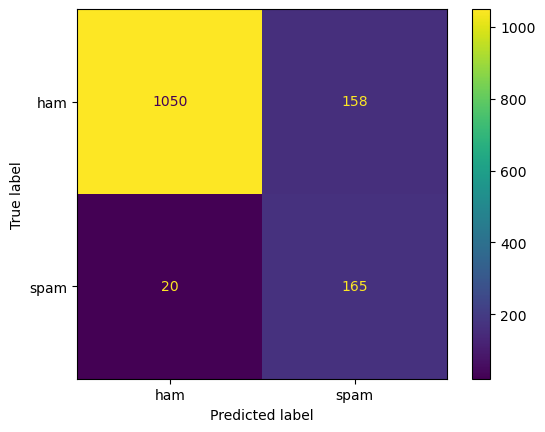

In [106]:
nb = GaussianNB()
nb.fit(x_train.toarray(), y_train)
y_pred = nb.predict(x_test.toarray())
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))
accuracy_score(y_test, y_pred)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.87      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



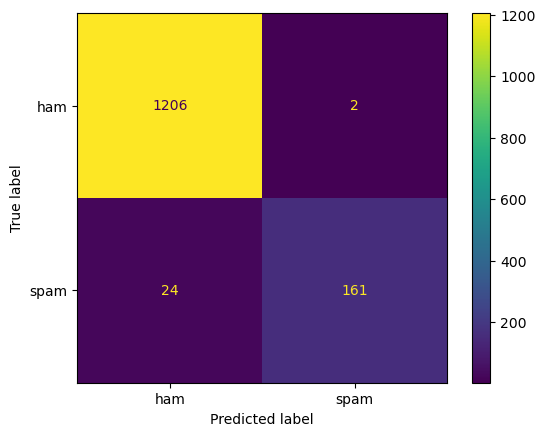

In [107]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [108]:
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
accuracy_score (y_test, y_pred)

0.9641062455132807

In [109]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 1, 2, 3, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [ ]:
grid = GridSearchCV(rf, param_grid = params, cv= 5, scoring = 'accuracy')
y_pred = rf.predict(x_test)
accuracy_score (y_test, y_pred)